In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Projects/AIML/Practice/01_Regression/Marketing Mix Model/data/'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data =  pd.read_csv(path +'Advertising.csv')

In [ ]:
data.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data = data.drop('Unnamed: 0', axis =1)

# **EDA**

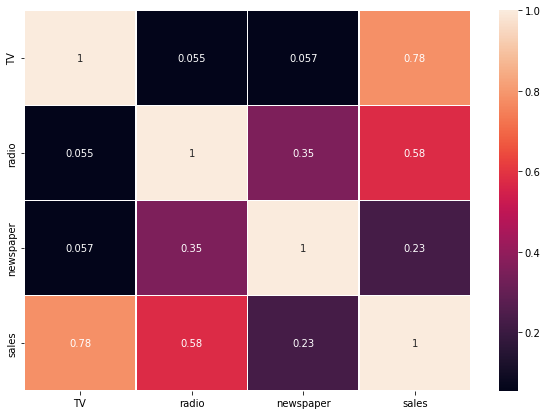

In [42]:
# Plot correlation  matrix
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(), annot = True, linewidth = 0.5)

**Observations :**
1.   There is strong Correlation between Sales and Spending on TV adds
2.   Radio is Moderatly Correlated with sales
2.   Sales and news paper adds are less correlated. 





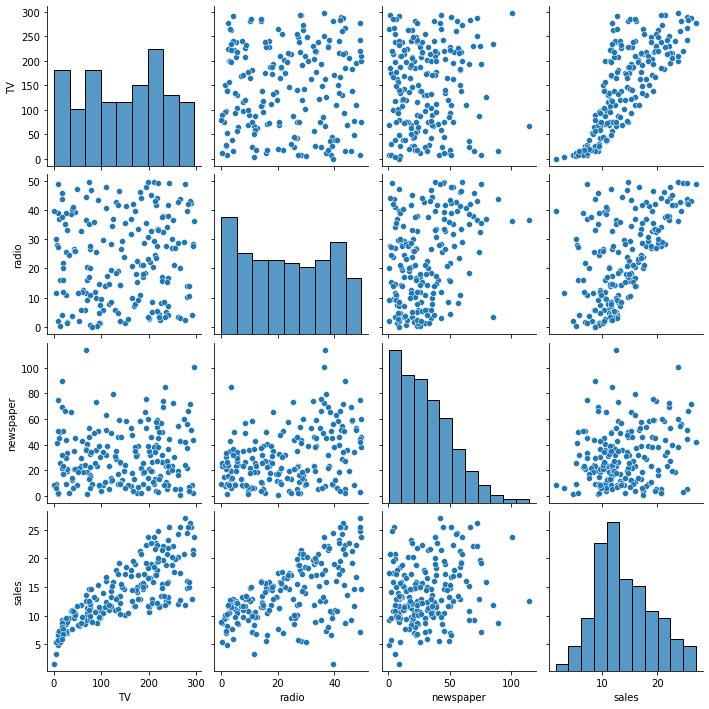

In [ ]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


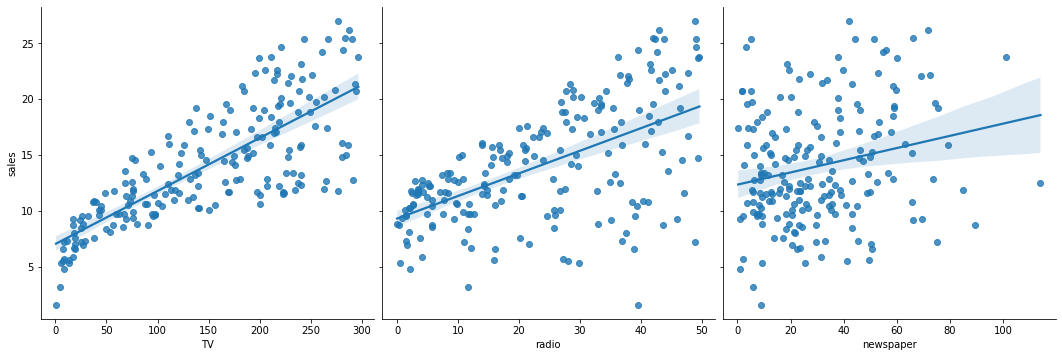

In [37]:
sns.pairplot(data, x_vars = ['TV','radio','newspaper'], y_vars='sales',size=5, kind='reg')

**Observations :**

Sales go high with increase in spending on TV adds and sales has no impact on spending  in radio and newspaper. This is similar to what we had even seen in Correlation matrix. 

# Modelling 

In [62]:
#train test split
from sklearn.model_selection import train_test_split
X= data.drop('sales', axis = 1)
X_train, X_test,y_train, y_test =  train_test_split(X, data['sales'], test_size = 0.33)


In [63]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
regr = RandomForestRegressor(max_depth=10, random_state=1, criterion = 'squared_error')
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)



mse = mean_squared_error(y_test,y_pred)

print(mse)
r2score = r2_score(y_test, y_pred)
#print("R-Square",lr.score(X_test,y_pred))
print("R-Square",r2score)


0.884097733048339
R-Square 0.9730213159090585


In [64]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression().fit(X_train, y_train)

lr.coef_, lr.intercept_

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)

print("MSE - ",mse)
r2score = r2_score(y_test, y_pred)
#print("R-Square",lr.score(X_test,y_pred))
print("R-Square",r2score)
print("train test score")
print("train - ", lr.score(X_train, y_train))
print("test - ", lr.score(X_test, y_test))

MSE -  2.1955635313936055
R-Square 0.933001281757815
train test score
train -  0.8672546566784154
test -  0.933001281757815


In [10]:
lr.coef_, lr.intercept_

(array([0.0476687 , 0.17403421, 0.00094746]), 2.9961194494529817)

In [65]:
#Ridge Regression Model, L2 regularization
from sklearn.linear_model import Ridge

lr_L2 = Ridge(alpha= 0.001)
lr_L2.fit(X_train, y_train)

y_pred = lr_L2.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE - ",mse)
#print("R-Square",lr_L2.score(X_test,y_pred))
r2score = r2_score(y_test, y_pred)
#print("R-Square",lr.score(X_test,y_pred))
print("R-Square",r2score)
print("train test score")
print("train - ", lr_L2.score(X_train, y_train))
print("test - ", lr_L2.score(X_test, y_test))

MSE -  2.1955636362939894
R-Square 0.9330012785567274
train test score
train -  0.8672546566784151
test -  0.9330012785567274


In [66]:
#Lasso Regression Model, L1 regularization
from sklearn.linear_model import Lasso

lr_L1 = Lasso(alpha= 0.001)
lr_L1.fit(X_train, y_train)

y_pred = lr_L1.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE - ",mse)
#print("R-Square",lr_L1.score(X_test,y_pred))
r2score = r2_score(y_test, y_pred)
print("R-Square",r2score)
print("train test score")
print("train - ", lr_L1.score(X_train, y_train))
print("test - ", lr_L1.score(X_test, y_test))

MSE -  2.1956127681956374
R-Square 0.9329997792721983
train test score
train -  0.8672546564736578
test -  0.9329997792721983


In [67]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=1, weights='distance')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE - ",mse)
#print("R-Square",lr_L1.score(X_test,y_pred))
r2score = r2_score(y_test, y_pred)
print("R-Square",r2score)
print("train test score")
print("train - ", knn.score(X_train, y_train))
print("test - ", knn.score(X_test, y_test))

MSE -  3.441212121212121
R-Square 0.8949896926123839
train test score
train -  1.0
test -  0.8949896926123839


In [50]:
#using OLS - Ordinary Least Square from statsModels

import statsmodels.api as sm

sm_lr = sm.OLS(y_train,X_train).fit()

print(sm_lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2346.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):                   1.27e-113
Time:                        08:53:59   Log-Likelihood:                         -286.19
No. Observations:                 134   AIC:                                      578.4
Df Residuals:                     131   BIC:                                      587.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# **Retraining Model by removing Newspaper feature**

Newspaper has got higher p value, so dropping it from the features and retraining the model


In [60]:
#train test split
X_1 = data[['TV','radio']]

from sklearn.model_selection import train_test_split
X= data.drop('sales', axis = 1)
X_train, X_test,y_train, y_test =  train_test_split(X_1, data['sales'], test_size = 0.33)


#Random Forest
print("************* Random Forest ******************")
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
regr = RandomForestRegressor(max_depth=10, random_state=1, criterion = 'squared_error')
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)



mse = mean_squared_error(y_test,y_pred)

print(mse)
r2score = r2_score(y_test, y_pred)
#print("R-Square",lr.score(X_test,y_pred))
print("R-Square",r2score)

#Linear Regression
print("************* Linear Regression ******************")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression().fit(X_train, y_train)

lr.coef_, lr.intercept_

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)

print("MSE - ",mse)
r2score = r2_score(y_test, y_pred)
#print("R-Square",lr.score(X_test,y_pred))
print("R-Square",r2score)

print("train test score")
print("train - ", lr.score(X_train, y_train))
print("test - ", lr.score(X_test, y_test))
#Ridge Regression Model, L2 regularization
print("************* Ridge Regression ******************")
from sklearn.linear_model import Ridge

lr_L2 = Ridge(alpha= 0.001)
lr_L2.fit(X_train, y_train)

y_pred = lr_L2.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE - ",mse)
#print("R-Square",lr_L2.score(X_test,y_pred))
r2score = r2_score(y_test, y_pred)
#print("R-Square",lr.score(X_test,y_pred))
print("R-Square",r2score)
print("train test score")
print("train - ", lr_L2.score(X_train, y_train))
print("test - ", lr_L2.score(X_test, y_test))
#Lasso Regression Model, L1 regularization
print("************* Lasso Regression ******************")
from sklearn.linear_model import Lasso

lr_L1 = Lasso(alpha= 0.001)
lr_L1.fit(X_train, y_train)

y_pred = lr_L1.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE - ",mse)
#print("R-Square",lr_L1.score(X_test,y_pred))
r2score = r2_score(y_test, y_pred)
print("R-Square",r2score)
print("train test score")
print("train - ", lr_L1.score(X_train, y_train))
print("test - ", lr_L1.score(X_test, y_test))

from sklearn import neighbors
print("************* KNN Regression ******************")
knn = neighbors.KNeighborsRegressor(n_neighbors=1, weights='distance')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE - ",mse)
#print("R-Square",lr_L1.score(X_test,y_pred))
r2score = r2_score(y_test, y_pred)
print("R-Square",r2score)
print("train test score")
print("train - ", knn.score(X_train, y_train))
print("test - ", knn.score(X_test, y_test))

************* Random Forest ******************
0.6314019078200577
R-Square 0.9755958871767128
************* Linear Regression ******************
MSE -  4.1322498739794336
R-Square 0.8402857341898498
train test score
train -  0.9181685727371061
test -  0.8402857341898498
************* Ridge Regression ******************
MSE -  4.132249709604561
R-Square 0.8402857405430504
train test score
train -  0.9181685727371057
test -  0.8402857405430504
************* Lasso Regression ******************
MSE -  4.1321494075467795
R-Square 0.8402896172857465
train test score
train -  0.9181685725733784
test -  0.8402896172857465
************* KNN Regression ******************
MSE -  1.333787878787879
R-Square 0.9484481920736471
train test score
train -  1.0
test -  0.9484481920736471
